**Using the Fishmarket dataset which contains a database of common fish species for the fish market and using classification techniques in the dataset.**

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the data**

In [2]:
df=pd.read_csv('Fish.csv')

**Analyzing rows and columns**

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


**Getting overall info from the data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


**Checking for null values**

In [6]:
df.isnull().sum()


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

**Getting statistical info from the columns of data**

In [7]:
df['Species'].describe() # Species column - species name of fish

count       159
unique        7
top       Perch
freq         56
Name: Species, dtype: object

In [8]:
df['Species'].value_counts() 

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [9]:
df['Weight'].describe() # Weight column - weight of fish in Gram g

count     159.000000
mean      398.326415
std       357.978317
min         0.000000
25%       120.000000
50%       273.000000
75%       650.000000
max      1650.000000
Name: Weight, dtype: float64

In [10]:
df['Length1'].describe() # Length1 column - vertical length in cm

count    159.000000
mean      26.247170
std        9.996441
min        7.500000
25%       19.050000
50%       25.200000
75%       32.700000
max       59.000000
Name: Length1, dtype: float64

In [11]:
df['Length2'].describe() # Length2 column - diagonal length in cm

count    159.000000
mean      28.415723
std       10.716328
min        8.400000
25%       21.000000
50%       27.300000
75%       35.500000
max       63.400000
Name: Length2, dtype: float64

In [12]:
df['Length3'].describe() # Length3 column - cross length in cm

count    159.000000
mean      31.227044
std       11.610246
min        8.800000
25%       23.150000
50%       29.400000
75%       39.650000
max       68.000000
Name: Length3, dtype: float64

In [13]:
df['Height'].describe() # Height column - height in cm 

count    159.000000
mean       8.970994
std        4.286208
min        1.728400
25%        5.944800
50%        7.786000
75%       12.365900
max       18.957000
Name: Height, dtype: float64

In [14]:
df['Width'].describe() # Width column - diagonal width in cm

count    159.000000
mean       4.417486
std        1.685804
min        1.047600
25%        3.385650
50%        4.248500
75%        5.584500
max        8.142000
Name: Width, dtype: float64

## Data Visualization

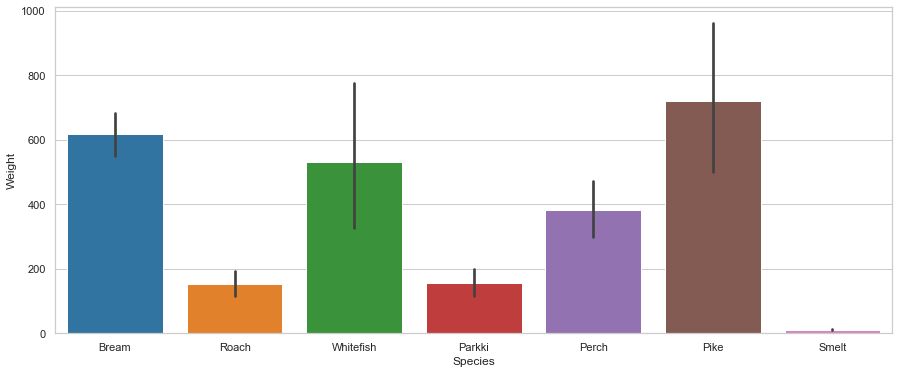

In [15]:
plt.figure(figsize=(15,6))
sns.set_context('notebook',font_scale=1)
sns.set_style('whitegrid')
sns.barplot(x='Species',y='Weight',data=df)

*Pike species are heaviest among the other species.*

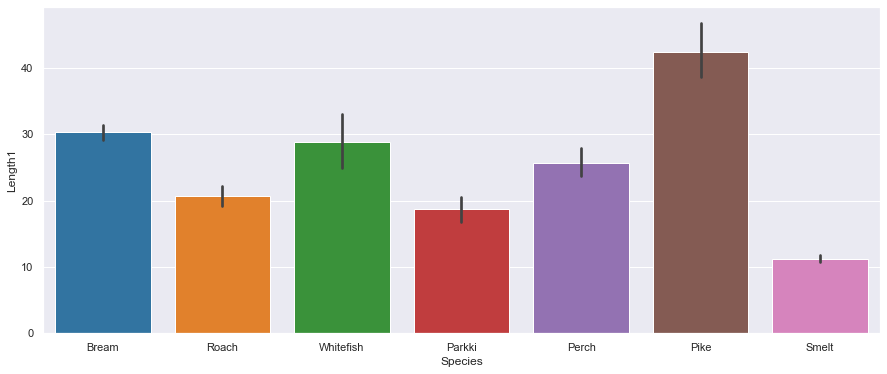

In [16]:
plt.figure(figsize=(15,6))
sns.set_context('notebook',font_scale=1)
sns.set_style('darkgrid')
sns.barplot(x='Species',y='Length1',data=df)

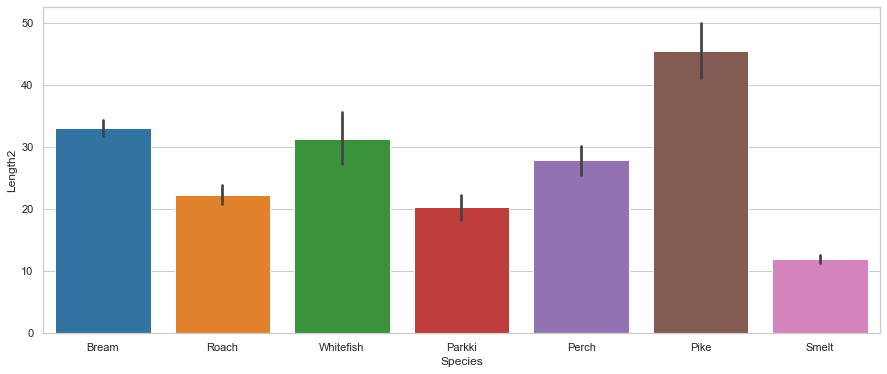

In [17]:
plt.figure(figsize=(15,6))
sns.set_context('notebook',font_scale=1)
sns.set_style('whitegrid')
sns.barplot(x='Species',y='Length2',data=df)

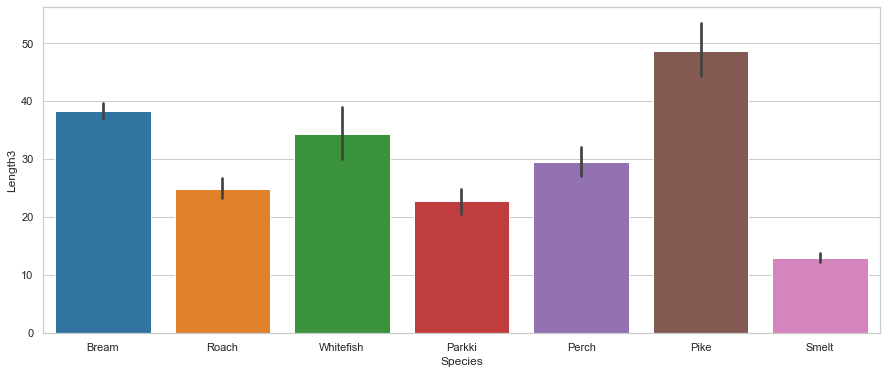

In [18]:
plt.figure(figsize=(15,6))
sns.set_context('notebook',font_scale=1)
sns.set_style('whitegrid')
sns.barplot(x='Species',y='Length3',data=df)

*Pike species have the longest vertical, diagonal, and cross length among the other species.*

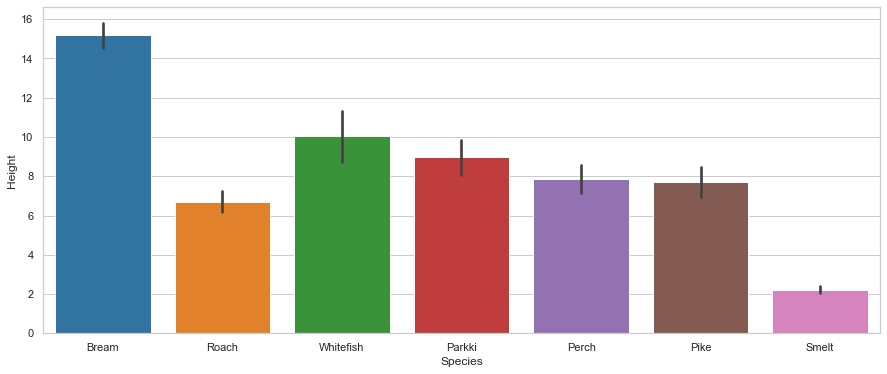

In [19]:
plt.figure(figsize=(15,6))
sns.set_context('notebook',font_scale=1)
sns.set_style('whitegrid')
sns.barplot(x='Species',y='Height',data=df)

*Bream species are the highest among the other species.*

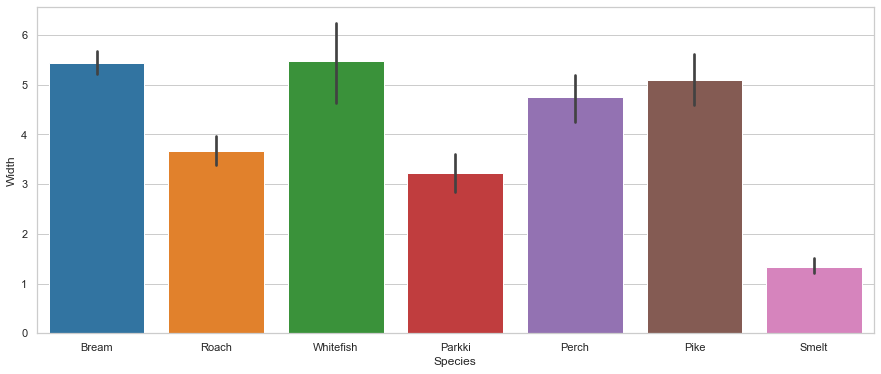

In [20]:
plt.figure(figsize=(15,6))
sns.set_context('notebook',font_scale=1)
sns.set_style('whitegrid')
sns.barplot(x='Species',y='Width',data=df)

*Whitefish species have a wider width than other species.*

**Detecting the outliers**

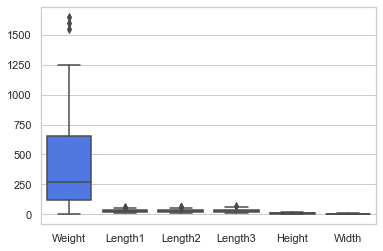

In [21]:
sns.boxplot(data=df,palette='rainbow')

**Removing the outliers using the IQR(Inter-Quartile Range) method**

In [22]:
Q1 = df.Weight.quantile(0.25) # Outlier detection and removal using IQR for Weight column
Q3 = df.Weight.quantile(0.75)
Q1, Q3

(120.0, 650.0)

In [23]:
IQR = Q3 - Q1
IQR

530.0

In [24]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-675.0, 1445.0)

In [25]:
df[(df.Weight<lower_limit)|(df.Weight>upper_limit)]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [26]:
df_no_outlier = df[(df.Weight>lower_limit)&(df.Weight<upper_limit)]
df_no_outlier

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


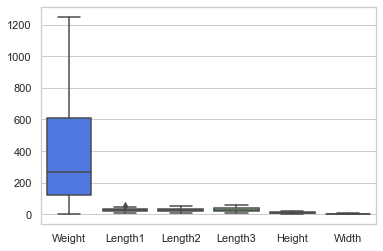

In [27]:
sns.boxplot(data=df_no_outlier,palette='rainbow')

In [28]:
Q1 = df_no_outlier.Length1.quantile(0.25)  # Outlier detection and removal using IQR for vertical length column
Q3 = df_no_outlier.Length1.quantile(0.75)
Q1, Q3

(19.0, 32.125)

In [29]:
IQR = Q3 - Q1
IQR

13.125

In [30]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-0.6875, 51.8125)

In [31]:
df_no_outlier[(df_no_outlier.Length1<lower_limit)|(df_no_outlier.Length1>upper_limit)]

,Species,Weight,Length1,Length2,Length3,Height,Width
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849


In [32]:
df_no_outlier = df_no_outlier[(df_no_outlier.Length1>lower_limit)&(df_no_outlier.Length1<upper_limit)]
df_no_outlier

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


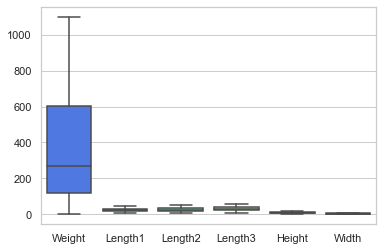

In [33]:
sns.boxplot(data=df_no_outlier ,palette='rainbow')

**Using different classification techniques to identify the species of fish correctly**

In [34]:
X = df_no_outlier.iloc[:, 1:].values # Separating the dependent and independent columns
y = df_no_outlier.iloc[:, 0].values

In [35]:
from sklearn.model_selection import train_test_split # Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [36]:
from sklearn.preprocessing import StandardScaler # Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression #Fitting LogisticRegression to the Training set
classifier=LogisticRegression(random_state=0) 
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [38]:
y_pred=classifier.predict(X_test)

In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [40]:
cm

array([[ 9,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  4,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  0,  3,  0],
       [ 0,  0,  1,  0,  0,  0,  0]], dtype=int64)

In [41]:
classifier.score(X_test,y_test)

0.8205128205128205

*The logistic Regression score for the correct classification of the species of fishes is 82% which is tied with the SVM classifier for being the most accurate among other classifiers.*

In [42]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB() #Fitting Naive Bayes classifier to the Training set
classifier.fit(X_train,y_train)

GaussianNB()

In [43]:
y_pred=classifier.predict(X_test)

In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [45]:
cm

array([[9, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0],
       [0, 0, 4, 0, 9, 0, 3],
       [0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 1],
       [0, 0, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 1, 0, 0]], dtype=int64)

In [46]:
classifier.score(X_test,y_test)

0.5897435897435898

*The Naive Bayes classifier score for the correct classification of the species of fishes is 58% which is the least among the other classifiers.*

In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2) #Fitting KNN classifier to the Training set
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred=classifier.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix # Making the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)

In [50]:
cm

array([[ 9,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  2,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  3,  0,  2,  0,  0],
       [ 0,  0,  1,  0,  0,  3,  0],
       [ 0,  0,  1,  0,  0,  0,  0]], dtype=int64)

In [51]:
classifier.score(X_test,y_test)

0.7948717948717948

*The KNN classifier score for the correct classification of the species of fishes is 79%.*

In [52]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0) #Fitting SVM to the Training set
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [53]:
y_pred=classifier.predict(X_test)

In [54]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [55]:
cm

array([[ 9,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  1,  0,  0,  0,  0]], dtype=int64)

In [56]:
classifier.score(X_test,y_test)

0.8205128205128205

*The SVM score for the correct classification of the species of fishes is 82% which is tied with the logistic Regression for being the most accurate among other classifiers.*

In [57]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0) #Fitting Decision Tree classifier to the Training set
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [58]:
y_pred=classifier.predict(X_test)

In [59]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [60]:
cm


array([[ 9,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  5,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  3,  1,  1,  0,  0],
       [ 0,  0,  1,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  1,  0,  0]], dtype=int64)

In [61]:
classifier.score(X_test,y_test)

0.6923076923076923

*The Decision Tree classifier score for the correct classification of the species of fishes is 69%.*

In [62]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0) #Fitting Random Forest classifier to the Training set
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [63]:
y_pred=classifier.predict(X_test)

In [64]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [65]:
cm

array([[ 9,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 13,  0,  2,  0,  1],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 1,  0,  3,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  1]], dtype=int64)

In [66]:
classifier.score(X_test,y_test)

0.7948717948717948

*The Random Forest classifier score for the correct classification of the species of fishes is 79%.*